# Task 1: Data Collection and Preprocessing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import sklearn.model_selection as train_test_split
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
import os

# Mount Drive
drive.mount('/content/drive')

# Path to the folder
folder_path = '/content/drive/My Drive/Digital Image Processing/subset_photos_jpg'

# Count files
num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
print(f"Number of files: {num_files}")

Mounted at /content/drive
Number of files: 2148


## 1.1 Setup drive connection and Loading data

In [ ]:
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')


# Step 3: Access the shared folder (assuming it's named 'Digital Image Processing')
shared_folder_path = '/content/drive/My Drive/DL for Engineers/Project DL'

try:
    print("Files in 'Digital Image Processing':", os.listdir(shared_folder_path))
except FileNotFoundError:
    print(f"Error: Please make sure you've added the shortcut with the correct name ('Digital Image Processing') to your Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in 'Digital Image Processing': ['Image Enhancement using SRGAN and CNN.ipynb', 'FP0 - Image Enhancement with Machine Learning .docx', 'subset_photos(100)']


In [ ]:
dataset_path = '/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)'

In [ ]:
image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith('.dng')]

In [ ]:
# Preprocess the images: resize to (256, 256) and normalize
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))  # Resize to 256x256
    image = image / 255.0  # Normalize pixel values
    return image

## 1.2 Installing required libraries

In [ ]:
pip install rawpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.4 MB/s eta 0:00:00


In [ ]:
!magick /content/drive/MyDrive/Digital\ Image\ Processing/Subset\ 1/subset_photos/example.dng /content/drive/MyDrive/Digital\ Image\ Processing/Subset\ 1/subset_photos/example.jpg



/bin/bash: line 1: magick: command not found


In [ ]:
!apt-get update
!apt-get install imagemagick

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,172 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,618 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

In [ ]:
!convert --version


Version: ImageMagick 6.9.11-60 Q16 x86_64 2021-01-25 https://imagemagick.org
Copyright: (C) 1999-2021 ImageMagick Studio LLC
License: https://imagemagick.org/script/license.php
Features: Cipher DPC Modules OpenMP(4.5) 
Delegates (built-in): bzlib djvu fftw fontconfig freetype heic jbig jng jp2 jpeg lcms lqr ltdl lzma openexr pangocairo png tiff webp wmf x xml zlib


In [ ]:
!pip install imageio

## 1.3 Converting images .dng to .jpg

In [ ]:
#converting the images to jpg
import rawpy
import imageio
import os

input_folder = "/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)"
output_folder = "/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)_jpg"

os.makedirs(output_folder, exist_ok=True)

def convert_dng_to_jpg(input_path, output_path):
    try:
        with rawpy.imread(input_path) as raw:
            rgb = raw.postprocess()
            imageio.imwrite(output_path, rgb)
            print(f'Converted {input_path} to {output_path}')
    except Exception as e:
        print(f'Error converting {input_path}: {e}')

for root, dirs, files in os.walk(input_folder):
    for file_name in files:
        if file_name.lower().endswith('.dng'):
            input_path = os.path.join(root, file_name)
            output_path = os.path.join(output_folder, file_name.replace('.dng', '.jpg'))
            convert_dng_to_jpg(input_path, output_path)


Converted /content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)/Copy of a2782-tc_DSC0438.dng to /content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)_jpg/Copy of a2782-tc_DSC0438.jpg
Converted /content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)/Copy of a2723-07-07-23-at-22h40m05s-_MG_2491.dng to /content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)_jpg/Copy of a2723-07-07-23-at-22h40m05s-_MG_2491.jpg
Converted /content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)/Copy of a2785-NKIM_MG_7776.dng to /content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)_jpg/Copy of a2785-NKIM_MG_7776.jpg
Converted /content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)/Copy of a2745-IMG_3472.dng to /content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)_jpg/Copy of a2745-IMG_3472.jpg
Converted /content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)/Copy of a2778-kme_11

In [ ]:
import os

# Specify the output folder path
output_folder = '/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)_jpg'  # Replace with your folder path

# List all JPEG files in the output folder
jpeg_files = [f for f in os.listdir(output_folder) if f.lower().endswith('.jpg')]

# Check the number of converted files
print(f'Number of JPEG files created: {len(jpeg_files)}')

# Optional: Print a sample of converted file names
print(f'Sample JPEG files: {jpeg_files[:5]}')



Number of JPEG files created: 99
Sample JPEG files: ['Copy of a2782-tc_DSC0438.jpg', 'Copy of a2723-07-07-23-at-22h40m05s-_MG_2491.jpg', 'Copy of a2785-NKIM_MG_7776.jpg', 'Copy of a2745-IMG_3472.jpg', 'Copy of a2778-kme_117.jpg']


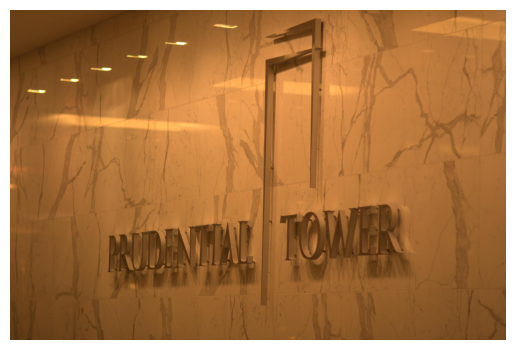

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Select a random JPEG file from the list
sample_image_path = os.path.join(output_folder, random.choice(jpeg_files))

# Open the image
img = Image.open(sample_image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

## 1.4 Creating High/Low Resolution Pairs

In [ ]:
from PIL import Image
import os

high_res_images = []  # List to store high-res images
low_res_images = []  # List to store low-res images

# Folder paths
high_res_folder = '/content/drive/MyDrive/Digital Image Processing/subset_photos_jpg'
low_res_folder = '/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos_jpg_downscaled'

# Load images and create pairs
for img_name in os.listdir(high_res_folder):
    img_path = os.path.join(high_res_folder, img_name)
    img = Image.open(img_path)

    # High-resolution image
    high_res_images.append(img)

    # Downscale image to create low-resolution pair
    low_res = img.resize((64, 64))  # Adjust the size as needed
    low_res_images.append(low_res)

    # Save the low-res image (optional)
    low_res.save(os.path.join(low_res_folder, img_name))

# Now you have high_res_images and low_res_images lists to use for training


High Resolution Image Shape: (714, 1072, 3)
Low Resolution Image Shape: (178, 268, 3)


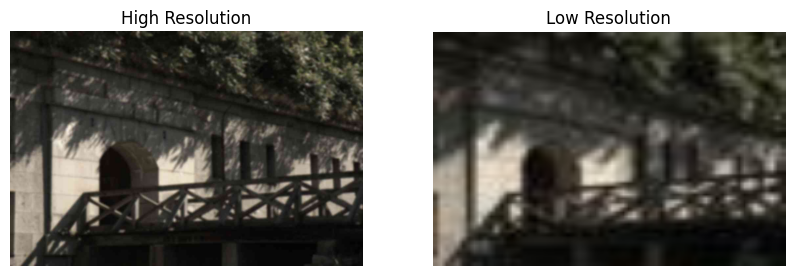

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import random

# Folder paths
high_res_folder = '/content/drive/MyDrive/Digital Image Processing/subset_photos_jpg'
low_res_folder = '/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos_jpg_downscaled'

# Get list of files in each folder
high_res_images = os.listdir(high_res_folder)
low_res_images = os.listdir(low_res_folder)

# Ensure that files are paired correctly (assuming same name for HR and LR images)
# For example: image1.jpg in high_res_folder and image1.jpg in low_res_folder
image_name = random.choice(high_res_images)

# Construct paths for matching images
high_res_image_path = os.path.join(high_res_folder, image_name)
low_res_image_path = os.path.join(low_res_folder, image_name)

# Check if the image exists in both folders
if not os.path.exists(high_res_image_path):
    print(f"High resolution image not found: {high_res_image_path}")
    exit()
if not os.path.exists(low_res_image_path):
    print(f"Low resolution image not found: {low_res_image_path}")
    exit()

# Load the high-res image
high_res_image = cv2.imread(high_res_image_path)

# Resize low-res image (downscale by 4x, adjust size as needed)
# Get dimensions of high-res image
height, width, _ = high_res_image.shape
low_res_image = cv2.imread(low_res_image_path)

# Resize to 1/4th of the high-res size (downscale by a factor of 4)
low_res_image = cv2.resize(low_res_image, (width // 4, height // 4))

# Convert images from BGR to RGB (OpenCV uses BGR by default)
high_res_image = cv2.cvtColor(high_res_image, cv2.COLOR_BGR2RGB)
low_res_image = cv2.cvtColor(low_res_image, cv2.COLOR_BGR2RGB)

# Print shapes before displaying images
print(f"High Resolution Image Shape: {high_res_image.shape}")
print(f"Low Resolution Image Shape: {low_res_image.shape}")

# Plot images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(high_res_image)
plt.title("High Resolution")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(low_res_image)
plt.title("Low Resolution")
plt.axis('off')

plt.show()




# TASK 2: EXPERIMENT 0 (Unused) - SRGAN MODEL


In [ ]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        # Define the layers for the generator (using upsampling layers)
        self.conv1 = nn.Conv2d(3, 64, kernel_size=9, padding=4)
        self.relu = nn.ReLU()

        # Residual blocks
        self.residual_blocks = self._make_residual_blocks(64, 64, 16)

        # Upsampling layers
        self.upsample = nn.Sequential(
            nn.ConvTranspose2d(64, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1)
        )

    def _make_residual_blocks(self, in_channels, out_channels, num_blocks):
        layers = []
        for _ in range(num_blocks):
            layers.append(ResidualBlock(in_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu(self.conv1(x))  # Initial conv layer
        x = self.residual_blocks(x)   # Apply residual blocks
        x = self.upsample(x)          # Upsample to high-res
        return x

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, in_channels, kernel_size=3, padding=1)

    def forward(self, x):
        residual = x
        x = self.relu(self.conv1(x))
        x = self.conv2(x)
        x += residual  # Add residual connection
        return x


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.LeakyReLU(0.2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.LeakyReLU(0.2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.LeakyReLU(0.2)
        self.conv4 = nn.Conv2d(256, 1, kernel_size=3, stride=1, padding=1)
        self.sigmoid = nn.Sigmoid()
        self.pool = nn.AdaptiveAvgPool2d(1)  # Global average pooling to reduce to 1x1 size

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.relu3(self.conv3(x))
        x = self.conv4(x)

        # Apply Global Average Pooling
        x = self.pool(x)  # Shape: [batch_size, 1, 1, 1]

        # Flatten to [batch_size, 1]
        x = x.view(x.size(0), -1)

        # Apply sigmoid activation for probability output
        x = self.sigmoid(x)  # Shape: [batch_size, 1]
        return x

In [ ]:
# Loss for adversarial network
def adversarial_loss(y_true, y_pred):
    return nn.BCELoss()(y_pred, y_true)

# Content loss (MSE between high-res and generated images)
def content_loss(y_true, y_pred):
    return nn.MSELoss()(y_pred, y_true)


In [ ]:
import torch
from torch.utils.data import DataLoader
from torch import nn, optim
from torchvision import transforms
import os
import cv2

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.LeakyReLU(0.2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.LeakyReLU(0.2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.LeakyReLU(0.2)
        self.conv4 = nn.Conv2d(256, 1, kernel_size=3, stride=1, padding=1)
        self.sigmoid = nn.Sigmoid()
        self.pool = nn.AdaptiveAvgPool2d(1)  # Global average pooling to reduce to 1x1 size

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.relu3(self.conv3(x))
        x = self.conv4(x)
        x = self.pool(x)  # Shape: [batch_size, 1, 1, 1]
        x = x.view(x.size(0), -1)  # Flatten to [batch_size, 1]
        x = self.sigmoid(x)  # Shape: [batch_size, 1]
        return x

# Generator (as before)
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(256, 3, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.relu3(self.conv3(x))
        x = self.conv4(x)
        return x

# Custom Dataset
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, high_res_folder, low_res_folder, transform=None, target_size=(256, 256)):
        self.high_res_folder = high_res_folder
        self.low_res_folder = low_res_folder
        self.transform = transform
        self.target_size = target_size
        self.high_res_images = os.listdir(high_res_folder)

    def __len__(self):
        return len(self.high_res_images)

    def __getitem__(self, idx):
        high_res_path = os.path.join(self.high_res_folder, self.high_res_images[idx])
        low_res_path = os.path.join(self.low_res_folder, self.high_res_images[idx])  # Same name

        high_res_image = cv2.imread(high_res_path)
        low_res_image = cv2.imread(low_res_path)

        # Resize images to target size
        high_res_image = cv2.resize(high_res_image, self.target_size)
        low_res_image = cv2.resize(low_res_image, self.target_size)

        # Convert BGR to RGB
        high_res_image = cv2.cvtColor(high_res_image, cv2.COLOR_BGR2RGB)
        low_res_image = cv2.cvtColor(low_res_image, cv2.COLOR_BGR2RGB)

        # Apply any transformations
        if self.transform:
            high_res_image = self.transform(high_res_image)
            low_res_image = self.transform(low_res_image)

        return low_res_image, high_res_image

# Transform to tensor
transform = transforms.ToTensor()

# Set folder paths (replace with actual paths)
high_res_folder = '/content/drive/MyDrive/Digital Image Processing/subset_photos_jpg'
low_res_folder = '/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos_jpg_downscaled'

# Initialize the dataset and dataloader
dataset = ImageDataset(high_res_folder, low_res_folder, transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss functions
criterion_GAN = nn.BCELoss()  # For GAN loss
criterion_content = nn.MSELoss()  # For content loss (reconstruction loss)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss_G = 0.0
    running_loss_D = 0.0

    for i, (low_res, high_res) in enumerate(dataloader):
        low_res, high_res = low_res.to(device), high_res.to(device)

        # Train Discriminator
        real_labels = torch.ones(low_res.size(0), 1).to(device)
        fake_labels = torch.zeros(low_res.size(0), 1).to(device)

        # Real images
        outputs_real = discriminator(high_res)
        d_loss_real = criterion_GAN(outputs_real, real_labels)

        # Fake images
        fake_images = generator(low_res)
        outputs_fake = discriminator(fake_images.detach())  # Detach to avoid updating generator
        d_loss_fake = criterion_GAN(outputs_fake, fake_labels)

        # Total Discriminator loss
        d_loss = d_loss_real + d_loss_fake

        # Update Discriminator
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        outputs_fake_for_G = discriminator(fake_images)  # For Generator's loss
        g_loss_GAN = criterion_GAN(outputs_fake_for_G, real_labels)
        g_loss_content = criterion_content(fake_images, high_res)  # Content (MSE) loss

        # Total Generator loss
        g_loss = g_loss_GAN + 0.001 * g_loss_content  # Add content loss with weight

        # Update Generator
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        # Print running loss statistics
        running_loss_G += g_loss.item()
        running_loss_D += d_loss.item()

    # Print epoch losses
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss G: {running_loss_G/len(dataloader):.4f}, Loss D: {running_loss_D/len(dataloader):.4f}")


Epoch [1/10] - Loss G: 0.7355, Loss D: 1.3901


KeyboardInterrupt: 

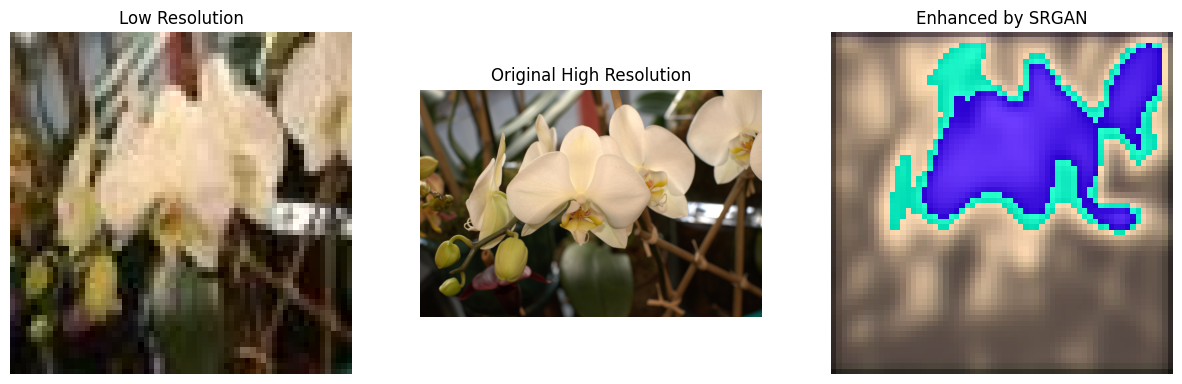

In [ ]:
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import ToPILImage
import os
import cv2
import random

# Load a random low-res image
high_res_folder = '/content/drive/MyDrive/Digital Image Processing/subset_photos_jpg'
low_res_folder = '/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos_jpg_downscaled'

# Ensure generator is in evaluation mode
generator.eval()

# Randomly select an image
image_name = random.choice(os.listdir(low_res_folder))
low_res_path = os.path.join(low_res_folder, image_name)
high_res_path = os.path.join(high_res_folder, image_name)

# Load and preprocess the low-res image
low_res_image = cv2.imread(low_res_path)
low_res_image = cv2.cvtColor(low_res_image, cv2.COLOR_BGR2RGB)
low_res_image_tensor = transforms.ToTensor()(low_res_image).unsqueeze(0).to(device)

# Generate enhanced (high-res) image
with torch.no_grad():
    enhanced_image_tensor = generator(low_res_image_tensor)

# Convert tensors to images for visualization
low_res_pil = ToPILImage()(low_res_image_tensor.squeeze(0).cpu())
enhanced_pil = ToPILImage()(enhanced_image_tensor.squeeze(0).cpu())
high_res_pil = ToPILImage()(transforms.ToTensor()(cv2.cvtColor(cv2.imread(high_res_path), cv2.COLOR_BGR2RGB)))

# Plot side-by-side
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(low_res_pil)
plt.title("Low Resolution")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(high_res_pil)
plt.title("Original High Resolution")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(enhanced_pil)
plt.title("Enhanced by SRGAN")
plt.axis("off")

plt.show()


# TASK 2: EXPERIMENT 1 - ESRGAN MODEL


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import torch
print(torch.cuda.is_available())  # Should print True


True


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(channels),
            nn.PReLU(),
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(channels)
        )

    def forward(self, x):
        return x + self.block(x)  # Residual connection

class Generator(nn.Module):
    def __init__(self, num_residual_blocks=16):
        super(Generator, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=9, stride=1, padding=4)
        self.prelu = nn.PReLU()
        self.residual_blocks = nn.Sequential(
            *[ResidualBlock(64) for _ in range(num_residual_blocks)]
        )
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.upsample = nn.Sequential(
            nn.Conv2d(64, 64 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.PReLU(),
            nn.Conv2d(64, 64 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.PReLU()
        )
        self.conv_out = nn.Conv2d(64, 3, kernel_size=9, stride=1, padding=4)

    def forward(self, x):
        x1 = self.prelu(self.conv1(x))
        x2 = self.bn2(self.conv2(self.residual_blocks(x1))) + x1  # Skip connection
        return self.conv_out(self.upsample(x2))


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        # 1. First Convolutional Layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1)  # Reduced filters to 32
        self.relu1 = nn.LeakyReLU(0.2, inplace=True)

        # 2. Second Convolutional Layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)  # Reduced filters to 64
        self.relu2 = nn.LeakyReLU(0.2, inplace=True)

        # 3. Third Convolutional Layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)  # Reduced filters to 128
        self.relu3 = nn.LeakyReLU(0.2, inplace=True)

        # 4. Global Average Pooling layer to reduce the spatial dimensions
        self.global_pool = nn.AdaptiveAvgPool2d(1)

        # 5. Final Fully Connected Layer to output a single scalar (real/fake)
        self.fc = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.relu3(self.conv3(x))

        # Apply global average pooling to reduce spatial dimensions to (batch_size, 128, 1, 1)
        x = self.global_pool(x)

        # Flatten to (batch_size, 128)
        x = x.view(x.size(0), -1)

        # Pass through the fully connected layer
        x = self.fc(x)

        # Apply Sigmoid activation for binary classification
        return self.sigmoid(x)

In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from torchvision import transforms

# Define transforms with resizing
resize_to = (256, 256)  # Set a consistent size for all images
transform = transforms.Compose([
    transforms.Resize(resize_to),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

class CustomDataset(Dataset):
    def __init__(self, lr_folder, hr_folder, transform=None):
        self.lr_folder = lr_folder
        self.hr_folder = hr_folder
        self.lr_images = sorted(os.listdir(lr_folder))
        self.hr_images = sorted(os.listdir(hr_folder))
        self.transform = transform

    def __len__(self):
        return len(self.lr_images)

    def __getitem__(self, idx):
        lr_image_path = os.path.join(self.lr_folder, self.lr_images[idx])
        hr_image_path = os.path.join(self.hr_folder, self.hr_images[idx])

        lr_image = Image.open(lr_image_path).convert('RGB')
        hr_image = Image.open(hr_image_path).convert('RGB')

        if self.transform:
            lr_image = self.transform(lr_image)
            hr_image = self.transform(hr_image)

        return lr_image, hr_image

# Dataset paths
lr_folder = '/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)_jpg_downscaled'
hr_folder = '/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)_jpg'

# Create dataset and dataloader
train_dataset = CustomDataset(lr_folder, hr_folder, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)

In [ ]:
import torch.optim as optim

# Initialize model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator(num_residual_blocks=16).to(device)
criterion_mse = nn.MSELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=1e-4, betas=(0.9, 0.999))

# Training loop
num_epochs = 50

for epoch in range(num_epochs):
    generator.train()
    epoch_loss = 0.0

    for idx, (lr_images, hr_images) in enumerate(train_loader):
        lr_images = lr_images.to(device)
        hr_images = hr_images.to(device)

        # Forward pass
        generated_images = generator(lr_images)

        # Ensure sizes match
        if generated_images.size() != hr_images.size():
            generated_images = F.interpolate(generated_images, size=hr_images.size()[2:], mode='bilinear', align_corners=False)

        # Compute loss
        loss = criterion_mse(generated_images, hr_images)

        # Backward pass
        optimizer_g.zero_grad()
        loss.backward()
        optimizer_g.step()

        epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}")


Epoch [1/50], Loss: 0.0790
Epoch [2/50], Loss: 0.0402
Epoch [3/50], Loss: 0.0360
Epoch [4/50], Loss: 0.0244
Epoch [5/50], Loss: 0.0206
Epoch [6/50], Loss: 0.0182
Epoch [7/50], Loss: 0.0179
Epoch [8/50], Loss: 0.0182
Epoch [9/50], Loss: 0.0168
Epoch [10/50], Loss: 0.0155
Epoch [11/50], Loss: 0.0154
Epoch [12/50], Loss: 0.0146
Epoch [13/50], Loss: 0.0145
Epoch [14/50], Loss: 0.0148
Epoch [15/50], Loss: 0.0144
Epoch [16/50], Loss: 0.0140
Epoch [17/50], Loss: 0.0141
Epoch [18/50], Loss: 0.0136
Epoch [19/50], Loss: 0.0132
Epoch [20/50], Loss: 0.0132
Epoch [21/50], Loss: 0.0131
Epoch [22/50], Loss: 0.0126
Epoch [23/50], Loss: 0.0124
Epoch [24/50], Loss: 0.0126
Epoch [25/50], Loss: 0.0124
Epoch [26/50], Loss: 0.0123
Epoch [27/50], Loss: 0.0123
Epoch [28/50], Loss: 0.0122
Epoch [29/50], Loss: 0.0120
Epoch [30/50], Loss: 0.0119
Epoch [31/50], Loss: 0.0120
Epoch [32/50], Loss: 0.0119
Epoch [33/50], Loss: 0.0121
Epoch [34/50], Loss: 0.0119
Epoch [35/50], Loss: 0.0119
Epoch [36/50], Loss: 0.0117
E

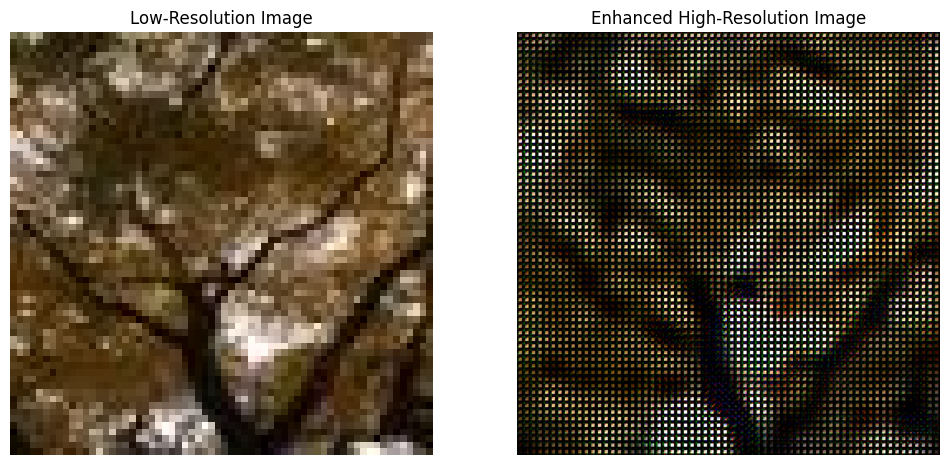

In [ ]:
import os
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
import torch
from PIL import Image, ImageEnhance
from torchvision.transforms import ToTensor

def display_images_with_brightness(generator, lr_folder_path, device, num_images=1, brightness_factor=1.2):
    """
    Display the low-resolution image and its enhanced version with brightness adjustment side by side.

    Args:
        generator (torch.nn.Module): Trained generator model.
        lr_folder_path (str): Path to the folder containing low-resolution images.
        device (torch.device): CUDA or CPU device used for processing.
        num_images (int): Number of images to display from the folder (default is 1).
        brightness_factor (float): Brightness factor for the enhanced image (default is 1.2).
    """
    # Get list of low-resolution image paths
    lr_image_paths = [os.path.join(lr_folder_path, filename) for filename in os.listdir(lr_folder_path) if filename.endswith(('png', 'jpg', 'jpeg'))]

    # Ensure at least one image exists
    if len(lr_image_paths) == 0:
        print("No images found in the specified folder.")
        return

    # Loop over the images and display them
    for idx, lr_image_path in enumerate(lr_image_paths[:num_images]):
        # Load the low-resolution image
        lr_image = Image.open(lr_image_path).convert("RGB")
        lr_tensor = ToTensor()(lr_image).unsqueeze(0).to(device)

        # Generate the enhanced high-resolution image
        generator.eval()
        with torch.no_grad():
            enhanced_tensor = generator(lr_tensor).clamp(0, 1).squeeze(0)

        # Convert tensors to PIL images
        enhanced_image = ToPILImage()(enhanced_tensor.cpu())

        # Apply brightness adjustment
        enhancer = ImageEnhance.Brightness(enhanced_image)
        enhanced_image_bright = enhancer.enhance(brightness_factor)

        # Plot the images side by side
        plt.figure(figsize=(12, 6))

        # Low-resolution image
        plt.subplot(1, 2, 1)
        plt.title("Low-Resolution Image")
        plt.imshow(lr_image)
        plt.axis("off")

        # Enhanced image with brightness adjustment
        plt.subplot(1, 2, 2)
        plt.title("Enhanced High-Resolution Image")
        plt.imshow(enhanced_image_bright)
        plt.axis("off")

        plt.show()

# Example usage
lr_folder_path = '/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)_jpg_downscaled'  # Replace with your low-res images folder path
display_images_with_brightness(generator, lr_folder_path, device, brightness_factor=1.8)


Epoch [1/50], Loss: 0.1024
Epoch [2/50], Loss: 0.0408
Epoch [3/50], Loss: 0.0301
Epoch [4/50], Loss: 0.0251
Epoch [5/50], Loss: 0.0216
Epoch [6/50], Loss: 0.0175
Epoch [7/50], Loss: 0.0177
Epoch [8/50], Loss: 0.0168
Epoch [9/50], Loss: 0.0152
Epoch [10/50], Loss: 0.0157
Epoch [11/50], Loss: 0.0149
Epoch [12/50], Loss: 0.0140
Epoch [13/50], Loss: 0.0135
Epoch [14/50], Loss: 0.0134
Epoch [15/50], Loss: 0.0135
Epoch [16/50], Loss: 0.0128
Epoch [17/50], Loss: 0.0126
Epoch [18/50], Loss: 0.0129
Epoch [19/50], Loss: 0.0124
Epoch [20/50], Loss: 0.0124
Epoch [21/50], Loss: 0.0122
Epoch [22/50], Loss: 0.0124
Epoch [23/50], Loss: 0.0123
Epoch [24/50], Loss: 0.0122
Epoch [25/50], Loss: 0.0122
Epoch [26/50], Loss: 0.0125
Epoch [27/50], Loss: 0.0120
Epoch [28/50], Loss: 0.0119
Epoch [29/50], Loss: 0.0120
Epoch [30/50], Loss: 0.0118
Epoch [31/50], Loss: 0.0119
Epoch [32/50], Loss: 0.0116
Epoch [33/50], Loss: 0.0117
Epoch [34/50], Loss: 0.0115
Epoch [35/50], Loss: 0.0118
Epoch [36/50], Loss: 0.0117
E

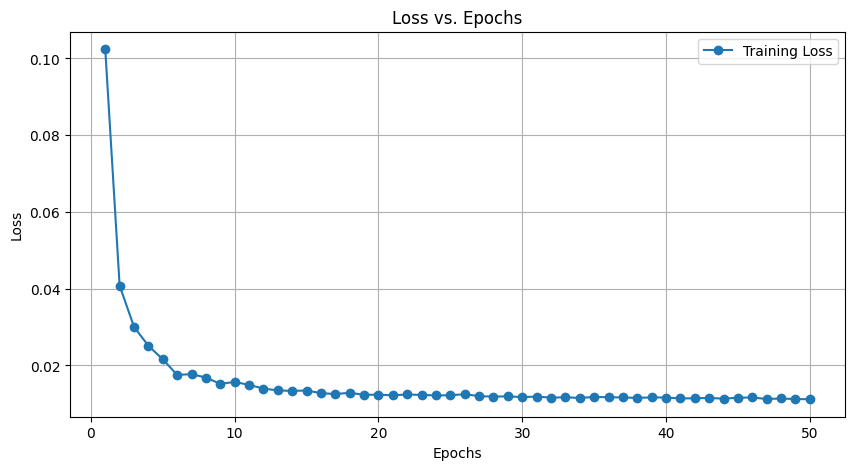

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Initialize model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator(num_residual_blocks=16).to(device)
criterion_mse = nn.MSELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=1e-4, betas=(0.9, 0.999))

# Training loop
num_epochs = 50
epoch_losses = []  # List to store losses for plotting

for epoch in range(num_epochs):
    generator.train()
    epoch_loss = 0.0

    for idx, (lr_images, hr_images) in enumerate(train_loader):
        lr_images = lr_images.to(device)
        hr_images = hr_images.to(device)

        # Forward pass
        generated_images = generator(lr_images)

        # Ensure sizes match
        if generated_images.size() != hr_images.size():
            generated_images = F.interpolate(generated_images, size=hr_images.size()[2:], mode='bilinear', align_corners=False)

        # Compute loss
        loss = criterion_mse(generated_images, hr_images)

        # Backward pass
        optimizer_g.zero_grad()
        loss.backward()
        optimizer_g.step()

        epoch_loss += loss.item()

    # Append average epoch loss to the list
    avg_epoch_loss = epoch_loss / len(train_loader)
    epoch_losses.append(avg_epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}")

# Plot Loss vs. Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_losses, label='Training Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.grid()
plt.show()


Epoch [1/50], Loss: 0.0807
Epoch [2/50], Loss: 0.0356
Epoch [3/50], Loss: 0.0272
Epoch [4/50], Loss: 0.0283
Epoch [5/50], Loss: 0.0218
Epoch [6/50], Loss: 0.0190
Epoch [7/50], Loss: 0.0171
Epoch [8/50], Loss: 0.0177
Epoch [9/50], Loss: 0.0155
Epoch [10/50], Loss: 0.0152
Epoch [11/50], Loss: 0.0157
Epoch [12/50], Loss: 0.0152
Epoch [13/50], Loss: 0.0152
Epoch [14/50], Loss: 0.0140
Epoch [15/50], Loss: 0.0138
Epoch [16/50], Loss: 0.0139
Epoch [17/50], Loss: 0.0140
Epoch [18/50], Loss: 0.0138
Epoch [19/50], Loss: 0.0138
Epoch [20/50], Loss: 0.0131
Epoch [21/50], Loss: 0.0127
Epoch [22/50], Loss: 0.0129
Epoch [23/50], Loss: 0.0133
Epoch [24/50], Loss: 0.0127
Epoch [25/50], Loss: 0.0123
Epoch [26/50], Loss: 0.0123
Epoch [27/50], Loss: 0.0121
Epoch [28/50], Loss: 0.0123
Epoch [29/50], Loss: 0.0120
Epoch [30/50], Loss: 0.0119
Epoch [31/50], Loss: 0.0119
Epoch [32/50], Loss: 0.0118
Epoch [33/50], Loss: 0.0116
Epoch [34/50], Loss: 0.0118
Epoch [35/50], Loss: 0.0117
Epoch [36/50], Loss: 0.0117
E

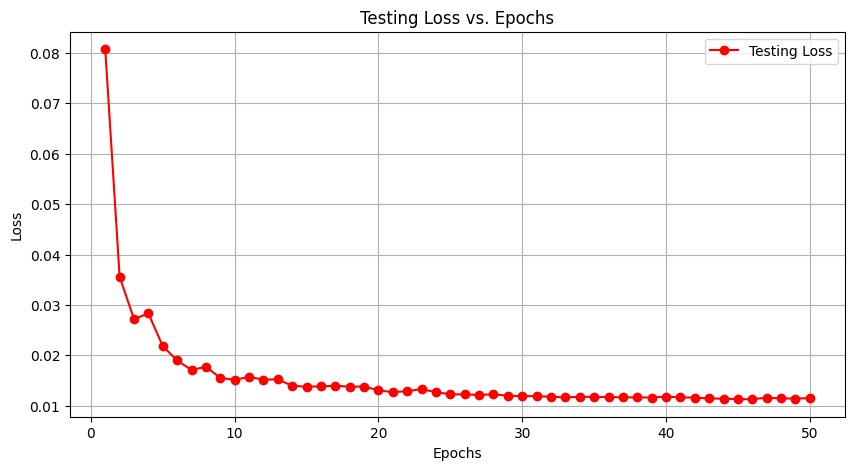

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Initialize model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator(num_residual_blocks=16).to(device)
criterion_mse = nn.MSELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=1e-4, betas=(0.9, 0.999))

# Training loop
num_epochs = 50
epoch_losses = []  # List to store losses for plotting

for epoch in range(num_epochs):
    generator.train()
    epoch_loss = 0.0

    for idx, (lr_images, hr_images) in enumerate(train_loader):
        lr_images = lr_images.to(device)
        hr_images = hr_images.to(device)

        # Forward pass
        generated_images = generator(lr_images)

        # Ensure sizes match
        if generated_images.size() != hr_images.size():
            generated_images = F.interpolate(generated_images, size=hr_images.size()[2:], mode='bilinear', align_corners=False)

        # Compute loss
        loss = criterion_mse(generated_images, hr_images)

        # Backward pass
        optimizer_g.zero_grad()
        loss.backward()
        optimizer_g.step()

        epoch_loss += loss.item()

    # Append average epoch loss to the list
    avg_epoch_loss = epoch_loss / len(train_loader)
    epoch_losses.append(avg_epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}")

# Plot Loss vs. Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_losses, label='Testing Loss', marker='o', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Testing Loss vs. Epochs')
plt.legend()
plt.grid()
plt.show()

# ESRGAN Model Before Optimal Hyperparameters (Unused Model)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Residual Block used in the Generator
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(channels),
            nn.PReLU(),
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(channels)
        )

    def forward(self, x):
        return x + self.block(x)  # Residual connection

class Generator(nn.Module):
    def __init__(self, num_residual_blocks=16):
        super(Generator, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=9, stride=1, padding=4)
        self.prelu = nn.PReLU()
        self.residual_blocks = nn.Sequential(
            *[ResidualBlock(64) for _ in range(num_residual_blocks)]
        )
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.upsample = nn.Sequential(
            nn.Conv2d(64, 256, kernel_size=3, stride=1, padding=1),  # 256 channels
            nn.PixelShuffle(2),  # Upscale by factor of 2
            nn.PReLU(),
            nn.Conv2d(64, 256, kernel_size=3, stride=1, padding=1),  # 256 channels
            nn.PixelShuffle(2),  # Upscale by factor of 2
            nn.PReLU()
        )
        self.conv_out = nn.Conv2d(64, 3, kernel_size=9, stride=1, padding=4)

    def forward(self, x):
        x1 = self.prelu(self.conv1(x))
        x2 = self.bn2(self.conv2(self.residual_blocks(x1))) + x1  # Skip connection
        out = self.upsample(x2)

        # Resize output to 256x256 to match target resolution
        out = F.interpolate(out, size=(256, 256), mode='bilinear', align_corners=False)

        return self.conv_out(out)


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        # 1. First Convolutional Layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1)  # Reduced filters to 32
        self.relu1 = nn.LeakyReLU(0.2, inplace=True)

        # 2. Second Convolutional Layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)  # Reduced filters to 64
        self.relu2 = nn.LeakyReLU(0.2, inplace=True)

        # 3. Third Convolutional Layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)  # Reduced filters to 128
        self.relu3 = nn.LeakyReLU(0.2, inplace=True)

        # 4. Global Average Pooling layer to reduce the spatial dimensions
        self.global_pool = nn.AdaptiveAvgPool2d(1)

        # 5. Final Fully Connected Layer to output a single scalar (real/fake)
        self.fc = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.relu3(self.conv3(x))

        # Apply global average pooling to reduce spatial dimensions to (batch_size, 128, 1, 1)
        x = self.global_pool(x)

        # Flatten to (batch_size, 128)
        x = x.view(x.size(0), -1)

        # Pass through the fully connected layer
        x = self.fc(x)

        # Apply Sigmoid activation for binary classification
        return self.sigmoid(x)

In [ ]:
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms

# Define transforms with resizing
resize_to = (256, 256)  # Set a consistent size for all images
transform = transforms.Compose([
    transforms.Resize(resize_to),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

class CustomDataset(Dataset):
    def __init__(self, lr_folder, hr_folder, transform=None):
        self.lr_folder = lr_folder
        self.hr_folder = hr_folder
        self.lr_images = sorted(os.listdir(lr_folder))
        self.hr_images = sorted(os.listdir(hr_folder))
        self.transform = transform

    def __len__(self):
        return len(self.lr_images)

    def __getitem__(self, idx):
        lr_image_path = os.path.join(self.lr_folder, self.lr_images[idx])
        hr_image_path = os.path.join(self.hr_folder, self.hr_images[idx])

        lr_image = Image.open(lr_image_path).convert('RGB')
        hr_image = Image.open(hr_image_path).convert('RGB')

        if self.transform:
            lr_image = self.transform(lr_image)
            hr_image = self.transform(hr_image)

        return lr_image, hr_image

# Dataset paths
lr_folder = '/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)_jpg_downscaled'
hr_folder = '/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)_jpg'

# Create dataset and dataloader
train_dataset = CustomDataset(lr_folder, hr_folder, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=2)


In [ ]:
import torch.optim as optim
import torch

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize models and optimizers
generator = Generator(num_residual_blocks=16).to(device)
discriminator = Discriminator().to(device)

# Loss functions
criterion_gan = nn.BCELoss()  # Binary Cross-Entropy loss for GANs
criterion_mse = nn.MSELoss()  # For the generator to match HR images

# Optimizers
optimizer_g = optim.Adam(generator.parameters(), lr=1e-4, betas=(0.9, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=1e-4, betas=(0.9, 0.999))

# Number of epochs
num_epochs = 10

for epoch in range(num_epochs):
    generator.train()
    discriminator.train()
    epoch_loss_g = 0.0
    epoch_loss_d = 0.0

    for idx, (lr_images, hr_images) in enumerate(train_loader):
        lr_images = lr_images.to(device)
        hr_images = hr_images.to(device)

        # Create labels for real and fake images
        real_labels = torch.ones(lr_images.size(0), 1).to(device)  # Real labels
        fake_labels = torch.zeros(lr_images.size(0), 1).to(device)  # Fake labels

        # Train Discriminator
        optimizer_d.zero_grad()

        # Real images
        real_outputs = discriminator(hr_images)
        loss_d_real = criterion_gan(real_outputs, real_labels)

        # Fake images (generated by the generator)
        fake_images = generator(lr_images)
        fake_outputs = discriminator(fake_images.detach())  # Detach to avoid updating generator
        loss_d_fake = criterion_gan(fake_outputs, fake_labels)

        # Total Discriminator Loss
        loss_d = loss_d_real + loss_d_fake
        loss_d.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()

        # Generator wants discriminator to think generated images are real
        fake_outputs = discriminator(fake_images)
        loss_g_gan = criterion_gan(fake_outputs, real_labels)

        # Generator MSE Loss (for image quality)
        loss_g_mse = criterion_mse(fake_images, hr_images)

        # Total Generator Loss
        loss_g = loss_g_gan + 0.001 * loss_g_mse  # Adjust the weight of the MSE term
        loss_g.backward()
        optimizer_g.step()

        # Accumulate losses for logging
        epoch_loss_g += loss_g.item()
        epoch_loss_d += loss_d.item()

    # Print average loss for this epoch
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss D: {epoch_loss_d / len(train_loader):.4f}, Loss G: {epoch_loss_g / len(train_loader):.4f}")

    # Optionally save the model checkpoints
    if (epoch+1) % 10 == 0:
        torch.save(generator.state_dict(), f'generator_epoch_{epoch+1}.pth')
        torch.save(discriminator.state_dict(), f'discriminator_epoch_{epoch+1}.pth')


Epoch [1/10] - Loss D: 1.4142, Loss G: 0.7322
Epoch [2/10] - Loss D: 1.4023, Loss G: 0.7643
Epoch [3/10] - Loss D: 1.4140, Loss G: 0.7231
Epoch [4/10] - Loss D: 1.4074, Loss G: 0.7161
Epoch [5/10] - Loss D: 1.4008, Loss G: 0.7174
Epoch [6/10] - Loss D: 1.4041, Loss G: 0.6929
Epoch [7/10] - Loss D: 1.3913, Loss G: 0.6981
Epoch [8/10] - Loss D: 1.3872, Loss G: 0.6953
Epoch [9/10] - Loss D: 1.3853, Loss G: 0.6981
Epoch [10/10] - Loss D: 1.3818, Loss G: 0.6877


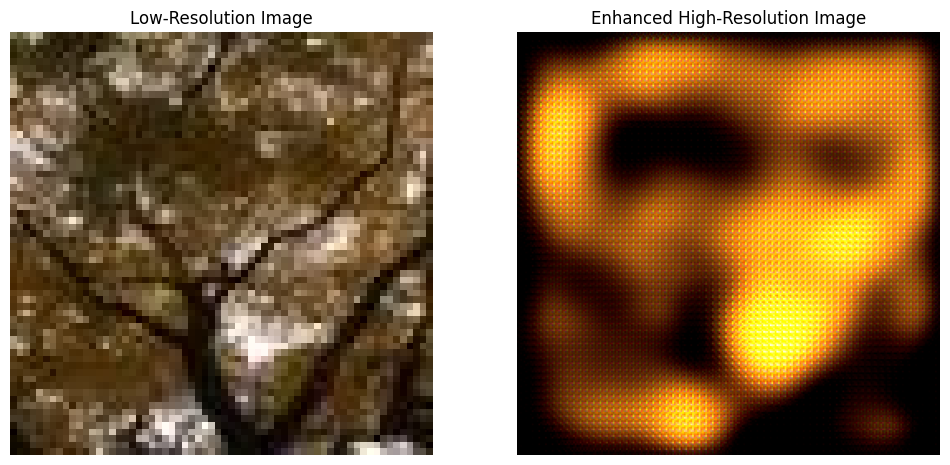

In [ ]:
import os
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
import torch
from PIL import Image, ImageEnhance
from torchvision.transforms import ToTensor

def display_images_with_brightness(generator, lr_folder_path, device, num_images=1, brightness_factor=1.2):
    """
    Display the low-resolution image and its enhanced version with brightness adjustment side by side.

    Args:
        generator (torch.nn.Module): Trained ESRGAN generator model.
        lr_folder_path (str): Path to the folder containing low-resolution images.
        device (torch.device): CUDA or CPU device used for processing.
        num_images (int): Number of images to display from the folder (default is 1).
        brightness_factor (float): Brightness factor for the enhanced image (default is 1.2).
    """
    # Get list of low-resolution image paths
    lr_image_paths = [os.path.join(lr_folder_path, filename) for filename in os.listdir(lr_folder_path) if filename.endswith(('png', 'jpg', 'jpeg'))]

    # Ensure at least one image exists
    if len(lr_image_paths) == 0:
        print("No images found in the specified folder.")
        return

    # Loop over the images and display them
    for idx, lr_image_path in enumerate(lr_image_paths[:num_images]):
        # Load the low-resolution image
        lr_image = Image.open(lr_image_path).convert("RGB")
        lr_tensor = ToTensor()(lr_image).unsqueeze(0).to(device)

        # Generate the enhanced high-resolution image
        generator.eval()
        with torch.no_grad():
            enhanced_tensor = generator(lr_tensor).clamp(0, 1).squeeze(0)

        # Convert tensors to PIL images
        enhanced_image = ToPILImage()(enhanced_tensor.cpu())

        # Apply brightness adjustment
        enhancer = ImageEnhance.Brightness(enhanced_image)
        enhanced_image_bright = enhancer.enhance(brightness_factor)

        # Plot the images side by side
        plt.figure(figsize=(12, 6))

        # Low-resolution image
        plt.subplot(1, 2, 1)
        plt.title("Low-Resolution Image")
        plt.imshow(lr_image)
        plt.axis("off")

        # Enhanced image with brightness adjustment
        plt.subplot(1, 2, 2)
        plt.title("Enhanced High-Resolution Image")
        plt.imshow(enhanced_image_bright)
        plt.axis("off")

        plt.show()

# Example usage
lr_folder_path = '/content/drive/MyDrive/DL for Engineers/Project DL/subset_photos(100)_jpg_downscaled'  # Replace with your low-res images folder path
display_images_with_brightness(generator, lr_folder_path, device, brightness_factor=1.8)


# CNN/UNET MODEL (Used for Denoising Instead, Unused)


In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Dataset class
class ImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_files = sorted(os.listdir(image_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, self.image_files[idx]  # Return image and filename

# Transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Dataset and DataLoader
image_dir = "/content/drive/MyDrive/Digital Image Processing/subset_photos_jpg"
dataset = ImageDataset(image_dir=image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# U-Net Model
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 3, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize model, loss function, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in range(10):
    model.train()
    for images, _ in dataloader:
        images = images.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/10], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.2566
Epoch [2/10], Loss: 0.1183
Epoch [3/10], Loss: 0.2587
Epoch [4/10], Loss: 0.1209
Epoch [5/10], Loss: 0.1570
Epoch [6/10], Loss: 0.1076
Epoch [7/10], Loss: 0.3692
Epoch [8/10], Loss: 0.3275
Epoch [9/10], Loss: 0.1356
Epoch [10/10], Loss: 0.2331


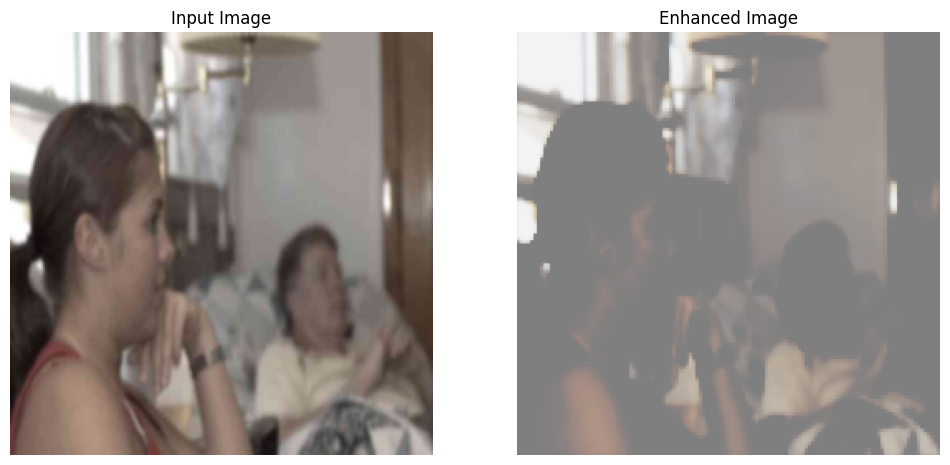

In [ ]:
# Random Input and Enhanced Image Display
model.eval()
with torch.no_grad():
    for images, filenames in dataloader:
        images = images.to(device)

        # Generate enhanced images
        outputs = model(images)
        outputs = outputs * 0.5 + 0.5  # Denormalize outputs
        images = images * 0.5 + 0.5    # Denormalize inputs

        # Display one random image and its enhanced version
        idx = np.random.randint(0, images.size(0))  # Random index
        input_image = images[idx].cpu().permute(1, 2, 0).numpy()  # CHW -> HWC
        enhanced_image = outputs[idx].cpu().permute(1, 2, 0).numpy()  # CHW -> HWC

        plt.figure(figsize=(12, 6))

        # Input Image
        plt.subplot(1, 2, 1)
        plt.imshow(input_image)
        plt.title("Input Image")
        plt.axis("off")

        # Enhanced Image
        plt.subplot(1, 2, 2)
        plt.imshow(enhanced_image)
        plt.title("Enhanced Image")
        plt.axis("off")

        plt.show()
        break  # Display for one batch only

# TASK 2 EXPERIMENT 2 - GAN MODEL

In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Dataset class
class ImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_files = sorted(os.listdir(image_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, self.image_files[idx]

# Transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Dataset and DataLoader
image_dir = "/content/drive/MyDrive/Digital Image Processing/subset_photos_jpg"
dataset = ImageDataset(image_dir=image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Generator and Discriminator Classes
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(6, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 1, kernel_size=4, padding=1),
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize models, loss functions, and optimizers
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator().to(device)
discriminator = Discriminator().to(device)
adversarial_loss = nn.BCELoss()
content_loss = nn.L1Loss()
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002)

In [ ]:
# Set number of epochs
epochs = 10  # You can adjust this value as needed

# Training loop with visualization
for epoch in range(epochs):
    for images, filenames in dataloader:
        images = images.to(device)

        # Generate fake images
        fake_images = generator(images)

        # Train Discriminator
        real_labels = torch.ones(images.size(0), 1).to(device)
        fake_labels = torch.zeros(images.size(0), 1).to(device)

        real_loss = adversarial_loss(discriminator(torch.cat([images, images], dim=1)), real_labels)
        fake_loss = adversarial_loss(discriminator(torch.cat([images, fake_images.detach()], dim=1)), fake_labels)
        d_loss = (real_loss + fake_loss) / 2

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        g_loss = adversarial_loss(discriminator(torch.cat([images, fake_images], dim=1)), real_labels)
        c_loss = content_loss(fake_images, images)
        total_g_loss = g_loss + 100 * c_loss

        optimizer_G.zero_grad()
        total_g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}], D Loss: {d_loss.item():.4f}, G Loss: {total_g_loss.item():.4f}")


Epoch [1/10], D Loss: 0.6772, G Loss: 2.6499
Epoch [2/10], D Loss: 0.6603, G Loss: 3.1583
Epoch [3/10], D Loss: 0.5930, G Loss: 3.1510
Epoch [4/10], D Loss: 0.6536, G Loss: 2.3628
Epoch [5/10], D Loss: 0.6072, G Loss: 2.5521
Epoch [6/10], D Loss: 0.6311, G Loss: 2.9403
Epoch [7/10], D Loss: 0.6039, G Loss: 2.5393
Epoch [8/10], D Loss: 0.6232, G Loss: 2.4465
Epoch [9/10], D Loss: 0.5992, G Loss: 2.5364
Epoch [10/10], D Loss: 0.6518, G Loss: 2.2998


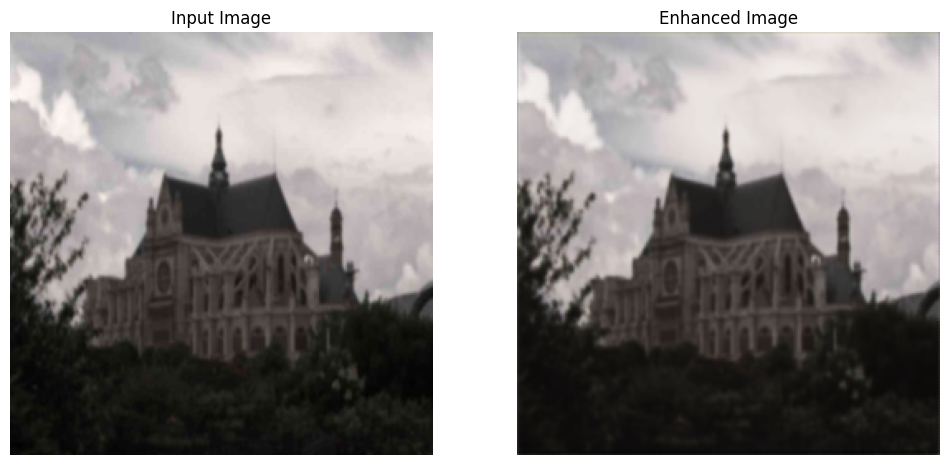

In [ ]:
# After the final epoch, display random input and enhanced image side by side
generator.eval()  # Set generator to evaluation mode
with torch.no_grad():  # No need to calculate gradients for inference
    for images, filenames in dataloader:
        images = images.to(device)
        fake_images = generator(images)

        # Denormalize images for visualization (assuming they were normalized with mean=0.5 and std=0.5)
        images = images * 0.5 + 0.5
        fake_images = fake_images * 0.5 + 0.5

        # Select a random sample from the batch
        idx = np.random.randint(0, images.size(0))
        input_image = images[idx].cpu().permute(1, 2, 0).numpy()  # CHW -> HWC
        enhanced_image = fake_images[idx].cpu().permute(1, 2, 0).numpy()  # CHW -> HWC

        # Display Input and Enhanced Image side by side
        plt.figure(figsize=(12, 6))

        # Input Image
        plt.subplot(1, 2, 1)
        plt.imshow(input_image)
        plt.title("Input Image")
        plt.axis("off")

        # Enhanced Image
        plt.subplot(1, 2, 2)
        plt.imshow(enhanced_image)
        plt.title("Enhanced Image")
        plt.axis("off")

        plt.show()

        break  # Only display one random pair, exit after one batch

Epoch [1/50], D Loss: 0.6533, G Loss: 5.1618
Epoch [2/50], D Loss: 0.6402, G Loss: 4.6128
Epoch [3/50], D Loss: 0.6296, G Loss: 4.1692
Epoch [4/50], D Loss: 0.6233, G Loss: 3.8645
Epoch [5/50], D Loss: 0.6203, G Loss: 3.6025
Epoch [6/50], D Loss: 0.6166, G Loss: 3.3852
Epoch [7/50], D Loss: 0.6144, G Loss: 3.2133
Epoch [8/50], D Loss: 0.6133, G Loss: 3.0793
Epoch [9/50], D Loss: 0.6122, G Loss: 2.9582
Epoch [10/50], D Loss: 0.6113, G Loss: 2.8729
Epoch [11/50], D Loss: 0.6095, G Loss: 2.7822
Epoch [12/50], D Loss: 0.6077, G Loss: 2.7097
Epoch [13/50], D Loss: 0.6056, G Loss: 2.6339
Epoch [14/50], D Loss: 0.6042, G Loss: 2.5701
Epoch [15/50], D Loss: 0.6026, G Loss: 2.5235
Epoch [16/50], D Loss: 0.6012, G Loss: 2.4796
Epoch [17/50], D Loss: 0.5996, G Loss: 2.4345
Epoch [18/50], D Loss: 0.5973, G Loss: 2.4021
Epoch [19/50], D Loss: 0.5948, G Loss: 2.3772
Epoch [20/50], D Loss: 0.5936, G Loss: 2.3224
Epoch [21/50], D Loss: 0.5912, G Loss: 2.3220
Epoch [22/50], D Loss: 0.5886, G Loss: 2.31

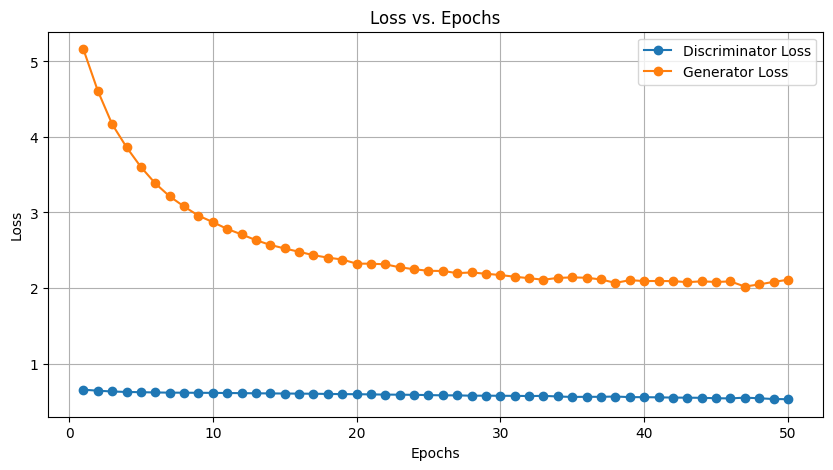

In [ ]:
import matplotlib.pyplot as plt

# Set number of epochs
epochs = 50  # You can adjust this value as needed

# Lists to store loss values for plotting
d_losses = []
g_losses = []

# Training loop with visualization
for epoch in range(epochs):
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0
    num_batches = 0

    for images, filenames in dataloader:
        images = images.to(device)
        num_batches += 1

        # Generate fake images
        fake_images = generator(images)

        # Train Discriminator
        real_labels = torch.ones(images.size(0), 1).to(device)
        fake_labels = torch.zeros(images.size(0), 1).to(device)

        real_loss = adversarial_loss(discriminator(torch.cat([images, images], dim=1)), real_labels)
        fake_loss = adversarial_loss(discriminator(torch.cat([images, fake_images.detach()], dim=1)), fake_labels)
        d_loss = (real_loss + fake_loss) / 2

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        g_loss = adversarial_loss(discriminator(torch.cat([images, fake_images], dim=1)), real_labels)
        c_loss = content_loss(fake_images, images)
        total_g_loss = g_loss + 100 * c_loss

        optimizer_G.zero_grad()
        total_g_loss.backward()
        optimizer_G.step()

        # Accumulate losses
        epoch_d_loss += d_loss.item()
        epoch_g_loss += total_g_loss.item()

    # Compute average loss for the epoch
    avg_d_loss = epoch_d_loss / num_batches
    avg_g_loss = epoch_g_loss / num_batches
    d_losses.append(avg_d_loss)
    g_losses.append(avg_g_loss)

    print(f"Epoch [{epoch+1}/{epochs}], D Loss: {avg_d_loss:.4f}, G Loss: {avg_g_loss:.4f}")

# Plot Loss vs. Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), d_losses, label='Discriminator Loss', marker='o')
plt.plot(range(1, epochs + 1), g_losses, label='Generator Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.grid()
plt.show()


Epoch [1/50], D Loss: 0.5704, G Loss: 1.9506
Epoch [2/50], D Loss: 0.5651, G Loss: 1.9551
Epoch [3/50], D Loss: 0.5747, G Loss: 1.9087
Epoch [4/50], D Loss: 0.5629, G Loss: 1.9620
Epoch [5/50], D Loss: 0.5641, G Loss: 1.9410
Epoch [6/50], D Loss: 0.5705, G Loss: 1.9108
Epoch [7/50], D Loss: 0.5669, G Loss: 1.9094
Epoch [8/50], D Loss: 0.5596, G Loss: 1.9325
Epoch [9/50], D Loss: 0.5586, G Loss: 1.9257
Epoch [10/50], D Loss: 0.5567, G Loss: 1.9301
Epoch [11/50], D Loss: 0.5578, G Loss: 1.9327
Epoch [12/50], D Loss: 0.5541, G Loss: 1.9286
Epoch [13/50], D Loss: 0.5581, G Loss: 1.9168
Epoch [14/50], D Loss: 0.5515, G Loss: 1.9191
Epoch [15/50], D Loss: 0.5489, G Loss: 1.9228
Epoch [16/50], D Loss: 0.5517, G Loss: 1.9075
Epoch [17/50], D Loss: 0.5483, G Loss: 1.9198
Epoch [18/50], D Loss: 0.5486, G Loss: 1.9262
Epoch [19/50], D Loss: 0.5551, G Loss: 1.8727
Epoch [20/50], D Loss: 0.5490, G Loss: 1.8894
Epoch [21/50], D Loss: 0.5439, G Loss: 1.9203
Epoch [22/50], D Loss: 0.5423, G Loss: 1.91

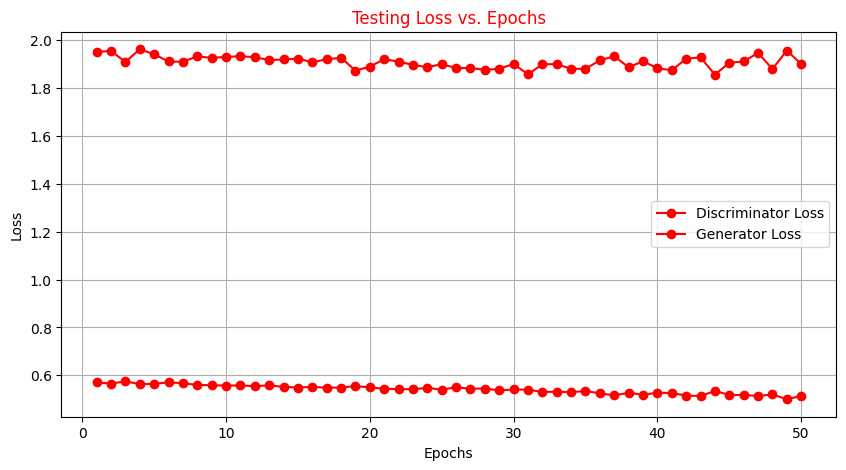

In [ ]:
import matplotlib.pyplot as plt

# Set number of epochs
epochs = 50  # You can adjust this value as needed

# Lists to store loss values for plotting
d_losses = []
g_losses = []

# Training loop with visualization
for epoch in range(epochs):
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0
    num_batches = 0

    for images, filenames in dataloader:
        images = images.to(device)
        num_batches += 1

        # Generate fake images
        fake_images = generator(images)

        # Train Discriminator
        real_labels = torch.ones(images.size(0), 1).to(device)
        fake_labels = torch.zeros(images.size(0), 1).to(device)

        real_loss = adversarial_loss(discriminator(torch.cat([images, images], dim=1)), real_labels)
        fake_loss = adversarial_loss(discriminator(torch.cat([images, fake_images.detach()], dim=1)), fake_labels)
        d_loss = (real_loss + fake_loss) / 2

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        g_loss = adversarial_loss(discriminator(torch.cat([images, fake_images], dim=1)), real_labels)
        c_loss = content_loss(fake_images, images)
        total_g_loss = g_loss + 100 * c_loss

        optimizer_G.zero_grad()
        total_g_loss.backward()
        optimizer_G.step()

        # Accumulate losses
        epoch_d_loss += d_loss.item()
        epoch_g_loss += total_g_loss.item()

    # Compute average loss for the epoch
    avg_d_loss = epoch_d_loss / num_batches
    avg_g_loss = epoch_g_loss / num_batches
    d_losses.append(avg_d_loss)
    g_losses.append(avg_g_loss)

    print(f"Epoch [{epoch+1}/{epochs}], D Loss: {avg_d_loss:.4f}, G Loss: {avg_g_loss:.4f}")

# Plot Loss vs. Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), d_losses, label='Discriminator Loss', marker='o', color='red')
plt.plot(range(1, epochs + 1), g_losses, label='Generator Loss', marker='o', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Testing Loss vs. Epochs', color='red')
plt.legend()
plt.grid()
plt.show()

